# Modelling the language using a Generalized Linear Model

In [2]:
df <- read.delim('../Materials/Binomial_prep.csv', sep=',', header=TRUE)

In [3]:
library(effects)

Loading required package: carData
lattice theme set by effectsTheme()
See ?effectsTheme for details.


In [4]:
#Two new binary columns whether a production is Dutch (True/False) or German (True/False)
df$Dutch <- as.integer(as.logical(df$Dutch))
df$German <- as.integer(as.logical(df$German))


head(df)

ï..,Date,Original.premiere,Directors,Normalised.title,Composer,Multiple.bill,Multiple.bill.1,Season,Occasion,Language,Dutch,German
0,1893-10-03,1821,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,False,False,1893-1894,N,German,0,1
1,1893-10-05,1971,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,False,False,1893-1894,N,German,0,1
2,1893-10-10,1821,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,False,False,1893-1894,N,German,0,1
3,1893-10-12,1971,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,False,False,1893-1894,N,German,0,1
4,1893-11-16,?,Edward Keurvels & Henry Fontaine,Charlotte Corday,Peter Benoit,False,False,1893-1894,N,Dutch,1,0
5,1893-10-17,1821,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,False,False,1893-1894,N,German,0,1


In [5]:
#Make sure that columns are interpreted as (ordered) factors

df$Season <- factor(df$Season, ordered = TRUE)
df$Date <- as.factor(df$Date)
df$Composer <- as.factor(df$Composer)
df$Normalised.title <- as.factor(df$Normalised.title)
df$Original.premiere <- as.factor(df$Original.premiere)
df$Multiple.bill <- as.factor(df$Multiple.bill) 
df$Occasion <- as.factor(df$Occasion)
df$Dutch <- as.factor(df$Dutch)
df$German <- as.factor(df$German)
df$Language <- as.factor(df$Language)
df$Directors <- as.factor(df$Directors)
df$Directors <- factor(df$Directors, ordered = TRUE)

In [6]:
str(df)
#check if all columns are formatted correctly

'data.frame':	4441 obs. of  13 variables:
 $ ï..              : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Date             : Factor w/ 3383 levels "01/01/1901","01/01/1907",..: 1771 1772 1773 1774 1784 1775 1776 1777 1778 1779 ...
 $ Original.premiere: Factor w/ 108 levels "","?","1608",..: 18 106 18 106 2 18 2 18 2 18 ...
 $ Directors        : Ord.factor w/ 7 levels "Edward Keurvels & Henry Fontaine"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Normalised.title : Factor w/ 328 levels "'T Minnebrugje",..: 111 320 111 320 23 111 23 111 23 111 ...
 $ Composer         : Factor w/ 193 levels "","?","Adolph L'Arronge",..: 36 38 36 38 162 36 162 36 162 36 ...
 $ Multiple.bill    : Factor w/ 2 levels "False","True": 1 1 1 1 1 1 1 1 1 1 ...
 $ Multiple.bill.1  : Factor w/ 2 levels "False","True": 1 1 1 1 1 1 1 1 1 1 ...
 $ Season           : Ord.factor w/ 38 levels "1893-1894"<"1894-1895"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Occasion         : Factor w/ 3 levels "G","N","P": 2 2 2 2 2 2 2 2 2 2 ...
 $ Language         : Fa

In [7]:
m1 <- glm(Dutch ~ Season + Occasion + Directors + Multiple.bill + Original.premiere, data = df, family = binomial)
drop1(m1)

#Directors does not improve the model.
#Warning message caused by original premiere since premiers of Original Dutch works nearly always correspond to the season, 
#since most original dutch works had their premiere AT the Antwerp Opera.
#Same goes for Directors. It is directly related to the season and therefore too much 

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,Df,Deviance,AIC
<none>,NA,1328.251,1634.251
Season,36,1499.401,1733.401
Occasion,2,1354.262,1656.262
Directors,5,1333.608,1629.608
Multiple.bill,1,1334.433,1638.433
Original.premiere,107,3711.397,3803.397


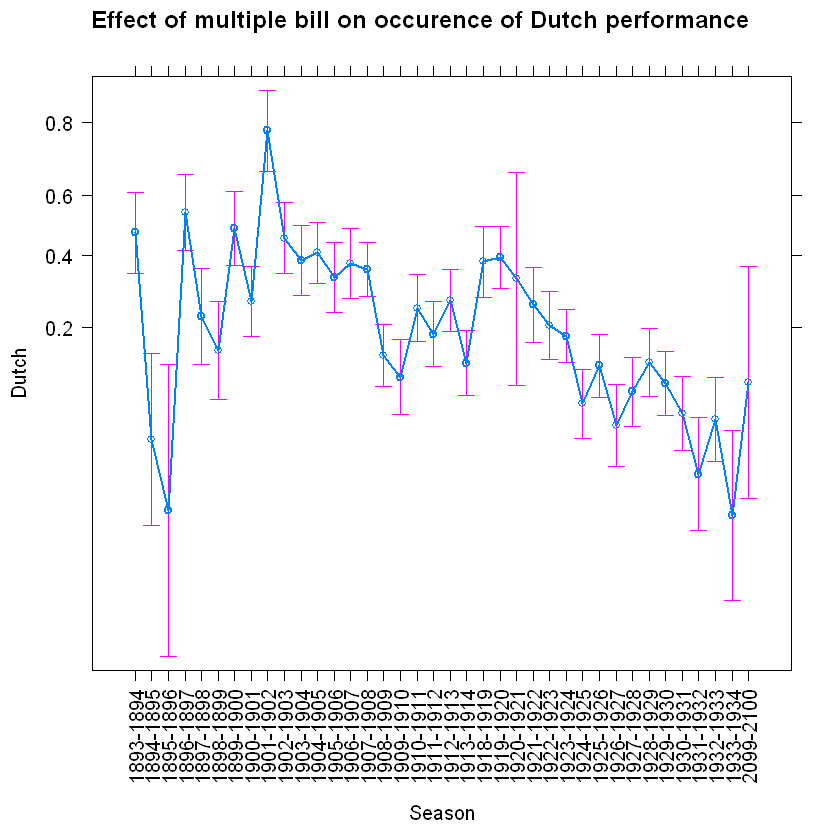

In [10]:
model_NL <- glm(Dutch ~Occasion + Multiple.bill + Season, data = df, family = binomial)
#new model containing only the relevant predictors

plot(effect("Season", model_NL), 
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of multiple bill on occurence of Dutch performance')

In [11]:
#we do the same for German
m2 <- glm(German ~ Season + Occasion + Multiple.bill + Directors + Original.premiere, data = df, family = binomial)
drop1(m2)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,Df,Deviance,AIC
<none>,NA,1778.828,2084.828
Season,36,2071.880,2305.880
Occasion,2,1786.140,2088.140
Multiple.bill,1,1800.182,2104.182
Directors,5,1780.439,2076.439
Original.premiere,107,5506.328,5598.328


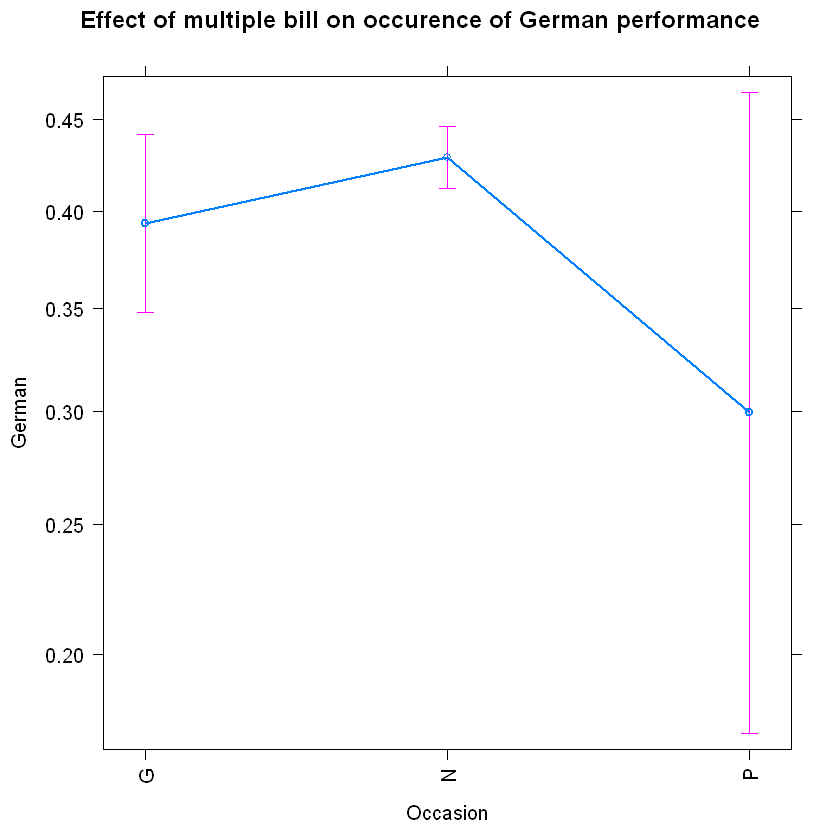

In [17]:
model_GER <- glm(German ~ Season + Multiple.bill + Occasion, data = df, family = binomial)

plot(effect("Occasion", model_GER), 
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of multiple bill on occurence of German performance')


## What happens when we delete Wagner from the dataset?

In [13]:
#remove all rows that contain Wagner in the 'Composer column'
df2 <- df[!grepl("Wagner", df$Composer), ]
print(nrow(df))
print(nrow(df2))

[1] 4441
[1] 3744


In [14]:
#Make sure that columns are interpreted as factors

df2$Collection <- factor(df2$Collection, ordered = TRUE)
df2$Season <- factor(df2$Season, ordered = TRUE)
df2$Date <- as.factor(df2$Date)
df2$Composer <- as.factor(df2$Composer)
df2$Normalised.title <- as.factor(df2$Normalised.title)
df2$Original.premiere <- as.factor(df2$Original.premiere)
df2$Occasion <- as.factor(df2$Occasion)
df2$Dutch <- as.factor(df2$Dutch)
df2$German <- as.factor(df2$German)
df2$Language <- as.factor(df2$Language)
#df2$Directors <- factor(df2$Directors)

tail(df2)

ERROR: Error in `$<-.data.frame`(`*tmp*`, Collection, value = structure(integer(0), .Label = character(0), class = c("ordered", : replacement has 0 rows, data has 3744


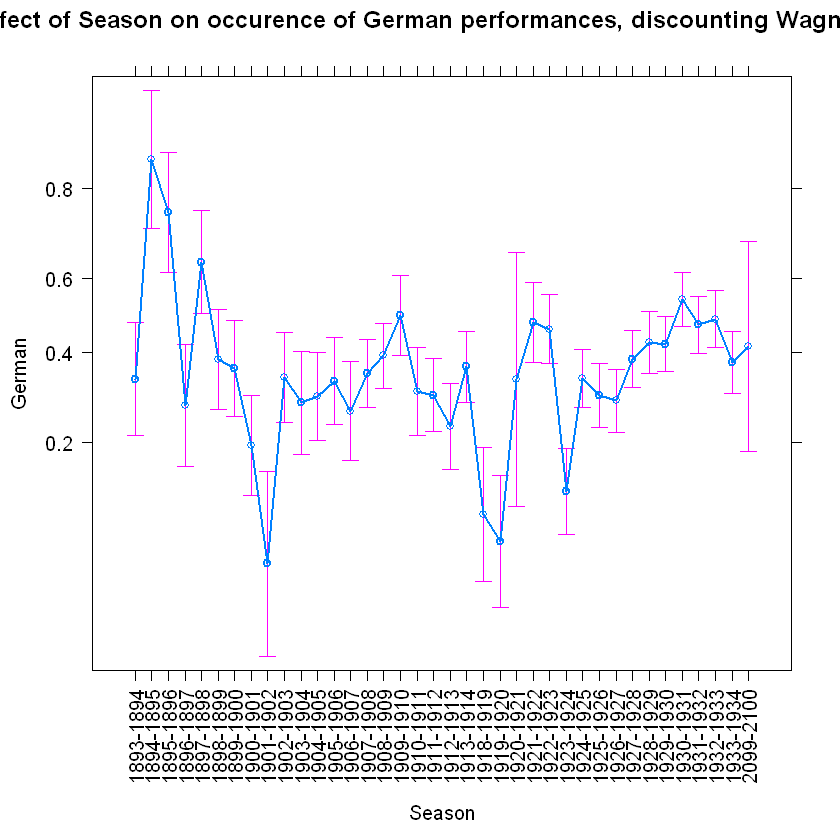

In [15]:
nowag <- glm(German ~ Season, data = df2, family = binomial)


plot(effect("Season", nowag),
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Season on occurence of German performances, discounting Wagner')

In [20]:
model_Ger_nowag <- glm(German ~Season + Occasion + Multiple.bill, data = df2, family = binomial)
drop1(model_Ger_nowag)

#Occasion is no longer a significant predictor when removing Wagner.
model_Ger_nowag <- glm(German ~Season + Multiple.bill, data = df2, family = binomial)

,Df,Deviance,AIC
<none>,NA,4446.470,4528.470
Season,37,4800.449,4808.449
Occasion,2,4458.368,4536.368
Multiple.bill,1,4529.482,4609.482


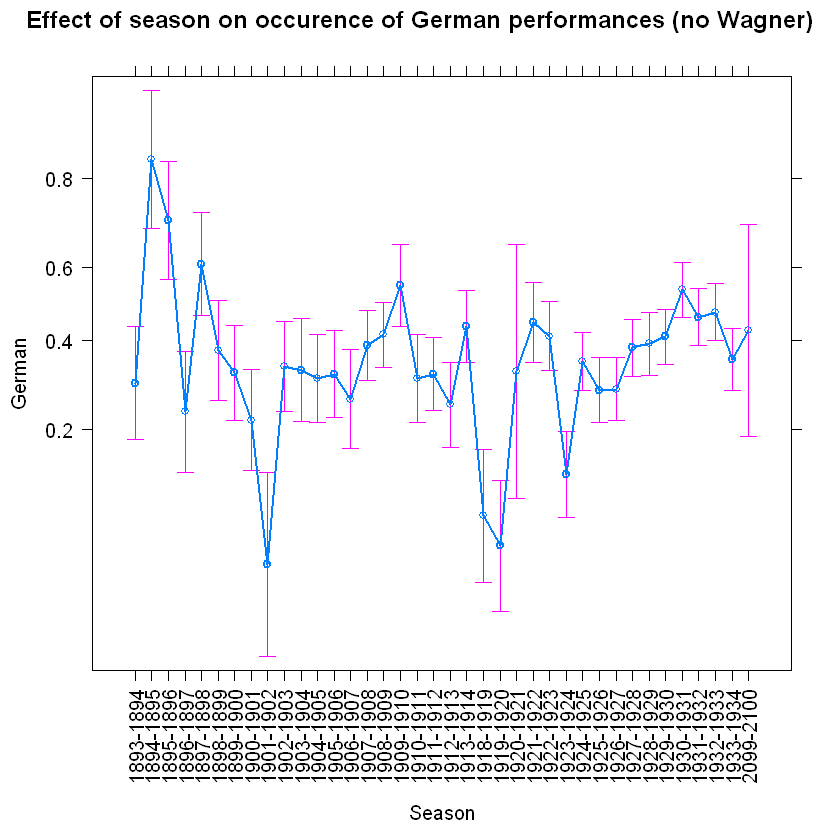

In [23]:

plot(effect("Season", model_Ger_nowag), 
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of season on occurence of German performances (no Wagner)')